In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("../functions/")
from plot_style import plot_style
colors = plot_style("../functions/fonts/")

../functions/plot_style.py:21: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
def import_coeffs(country, ycol, suffs=""):
    with open("./output-static/" + country + "_" + ycol + suffs + ".pkl", "rb") as file:
        coeffs = pkl.load(file)
    return coeffs


def print_stats(arr, name):
    med, q1, q2 = np.median(arr), np.quantile(arr, q=0.025), np.quantile(arr, q=0.975)
    print("\t{0}: {1} [{2}; {3}]".format(name, np.round(med, 2), np.round(q1, 2), np.round(q2, 2)))
     
        
def print_stats_OLS(country, ycol, c, complete=False, suffs=""):
    coeffs = import_coeffs(country, ycol, suffs=suffs)
    if complete:
        k = "complete"
    else:
        k = c
    med = coeffs[k]['OLS']['params'][c]
    ci = coeffs[k]['OLS']['CI']
    q1, q2 = ci.loc[ci.index == c][0].values[0], ci.loc[ci.index == c][1].values[0]
    print("\tOLS {0}: {1} [{2}; {3}]".format(c, np.round(med, 2), np.round(q1, 2), np.round(q2, 2)))
    
    
def get_stats_OLS(country, ycol, c, complete=False, suffs=""):
    coeffs = import_coeffs(country, ycol, suffs=suffs)
    if complete:
        k = "complete"
    else:
        k = c
    med = coeffs[k]['OLS']['params'][c]
    ci = coeffs[k]['OLS']['CI']
    q1, q2 = ci.loc[ci.index == c][0].values[0], ci.loc[ci.index == c][1].values[0]
    return med, q1, q2


def get_stats_Ridge(country, ycol, c, complete=False, suffs=""):
    coeffs = import_coeffs(country, ycol, suffs=suffs)
    if complete:
        k = "complete"
    else:
        k = c
    arr = coeffs[k]['Ridge'].params[c]
    med, q1, q2 = np.median(arr), np.quantile(arr, q=0.025), np.quantile(arr, q=0.975)
    return med, q1, q2

    
def print_results(country, ycol, suffs=""):
    # import
    coeffs = import_coeffs(country, ycol, suffs=suffs)

    print("\n\n\n{0} - {1}".format(country, ycol))
    print("\nSingle Variable Regression")
    for c in coeffs.keys():
        if "complete" not in c:
            print_stats(coeffs[c]["Ridge"].params[c], c)
            print_stats_OLS(country, ycol, c, complete=False,  suffs=suffs)

    print("\n\nMultiple Variable Regression")
    for c in coeffs["complete"]["Ridge"].params.keys():
        print_stats(coeffs["complete"]["Ridge"].params[c], c)
        print_stats_OLS(country, ycol, c, complete=True,  suffs=suffs)

    print("\n")
    delta_r2 = coeffs['complete']['OLS']['r2'] - coeffs['complete_nombps']['OLS']['r2']
    delta_aic = coeffs['complete']['OLS']['aic'] - coeffs['complete_nombps']['OLS']['aic']
    print("\tR2: {0}".format(coeffs['complete']['OLS']['r2']))
    print("\tDelta AIC: {0}".format(delta_aic))
    print("\tDelta R2: {0}".format(delta_r2))
    print("\tRelative Likelihood: {0}".format(np.exp(delta_aic / 2)))



In [3]:
print_results("colombia", "max_movs")
print_results("ecuador", "max_movs")
print_results("el-salvador", "max_movs")


print_results("colombia", "max_stay")
print_results("ecuador", "max_stay")
print_results("el-salvador", "max_stay")




colombia - max_movs

Single Variable Regression
	cases: -0.06 [-0.07; 8.86]
	OLS cases: -0.06 [-0.16; 0.04]
	download_mbps_fixed: 0.62 [0.54; 0.7]
	OLS download_mbps_fixed: 0.62 [0.55; 0.7]
	rwi_weight: 0.7 [0.64; 0.76]
	OLS rwi_weight: 0.7 [0.63; 0.77]
	gdp_per_capita: 0.08 [-0.03; 0.3]
	OLS gdp_per_capita: 0.08 [-0.02; 0.17]
	popDANE: 0.36 [0.27; 0.44]
	OLS popDANE: 0.36 [0.27; 0.45]
	pop_density: 0.39 [0.26; 0.89]
	OLS pop_density: 0.39 [0.3; 0.49]
	pop60plus_ratio: 0.1 [0.02; 0.34]
	OLS pop60plus_ratio: 0.1 [-0.0; 0.2]
	tests_unique_dev_fixed: 0.32 [0.22; 0.64]
	OLS tests_unique_dev_fixed: 0.31 [0.22; 0.41]
	internet_pen: 0.65 [0.59; 0.72]
	OLS internet_pen: 0.65 [0.58; 0.73]
	labor_formality_index: 0.41 [0.33; 0.51]
	OLS labor_formality_index: 0.42 [0.33; 0.51]
	primary_ratio: -0.4 [-0.49; -0.3]
	OLS primary_ratio: -0.4 [-0.5; -0.31]
	secondary_ratio: 0.34 [0.24; 0.45]
	OLS secondary_ratio: 0.34 [0.25; 0.44]
	tertiary_ratio: 0.18 [0.07; 0.27]
	OLS tertiary_ratio: 0.18 [0.08; 0.

In [7]:
def errplot(country, ycol, feature, complete, color, ax, y, OLS, suffs=""):
    if OLS:
        med, q1, q2 = get_stats_OLS(country, ycol, feature, complete=complete, suffs=suffs)
    else:
        med, q1, q2 = get_stats_Ridge(country, ycol, feature, complete=complete, suffs=suffs)
    p = ax.scatter([med], [y], color=color)
    ax.plot([q1, q2], [y,y], color=color)
    return p


def coeffplot(ycol, complete, legend, savename, title, OLS, xmax=None, xmin=None,
             features = ['cases', 'download_mbps_fixed', 'rwi_weight', 'gdp_per_capita', 'popDANE', 'pop_density', 'pop60plus_ratio'],
             features_names = ["cases", 'Mbps', 'RWI', 'GDP', 'population', 'density', '60+'],  suffs="", showbox=True):

    y, w = 0, 0.2
    fig, ax = plt.subplots(figsize=(5,7), dpi=300)
    
    avg_values = []
    # get order of features 
    for feature in features:
        tot, n = 0, 0
        if OLS:            
            med_col, q1_col, q2_col = get_stats_OLS("colombia", ycol, feature, complete=complete, suffs=suffs)
            tot += med_col
            n += 1
            if feature == "popDANE":
                feature = "pop2020"
                
            if feature != "internet_pen":
                med_slv, q1_slv, q2_slv = get_stats_OLS("el-salvador", ycol, feature, complete=complete, suffs=suffs)
                tot += med_slv
                n += 1
                
                med_ecu, q1_ecu, q2_ecu = get_stats_OLS("ecuador", ycol, feature, complete=complete, suffs=suffs)
                tot += med_ecu
                n += 1
        else:
            med_col, q1_col, q2_col = get_stats_Ridge("colombia", ycol, feature, complete=complete, suffs=suffs)
            tot += med_col
            n += 1
            if feature == "popDANE":
                feature = "pop2020"

            if feature != "internet_pen":
                med_slv, q1_slv, q2_slv = get_stats_Ridge("el-salvador", ycol, feature, complete=complete, suffs=suffs)
                tot += med_slv
                n += 1
                
                med_ecu, q1_ecu, q2_ecu = get_stats_Ridge("ecuador", ycol, feature, complete=complete, suffs=suffs)
                tot += med_ecu
                n += 1
            
        avg_values.append(tot / n)
        
    sort_idx = np.argsort(avg_values)

    for feature in np.array(features)[sort_idx]:
        p1 = errplot("colombia", ycol, feature, complete, colors[0], ax, y+w, OLS=OLS, suffs=suffs)
        if feature == "popDANE":
            feature = "pop2020"
        if feature != "internet_pen":
            p2 = errplot("ecuador", ycol, feature, complete, colors[3], ax, y, OLS=OLS, suffs=suffs)
            p3 = errplot("el-salvador", ycol, feature, complete, colors[1], ax, y-w, OLS=OLS, suffs=suffs)
        y += 1

    ax.set_yticks(range(len(features)))
    ax.set_yticklabels(np.array(features_names)[sort_idx])
    ax.vlines(0, -10, 10,  linestyle='--', color='grey')
    ax.set_ylim(ymin=-0.5, ymax=len(features)-0.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.yaxis.set_tick_params(width=0)
    ax.set_xlabel("$\\beta$")
    ax.set_title(title, weight='bold')
    
    if showbox:
        from matplotlib import patches
        fig.add_artist(patches.Rectangle((-0.01, 0.665), 0.93, 0.1, facecolor="grey", alpha=0.15, linewidth = 0))
        fig.add_artist(patches.Rectangle((-0.01, 0.665 - 0.214), 0.93, 0.1, facecolor="grey", alpha=0.15, linewidth = 0))
        fig.add_artist(patches.Rectangle((-0.01, 0.665 - 2*0.214), 0.93, 0.1, facecolor="grey", alpha=0.15, linewidth = 0))

    if xmax != None:
        ax.set_xlim(xmax=xmax)
        
    if xmin != None:
        ax.set_xlim(xmin=xmin)
        
    if legend:
        ax.legend([p1, p2, p3], ["Colombia", "Ecuador", "El Salvador"], frameon=False, loc="lower right")
    plt.savefig("./img/" + savename + "_" + ycol + ".pdf", bbox_inches='tight')
    


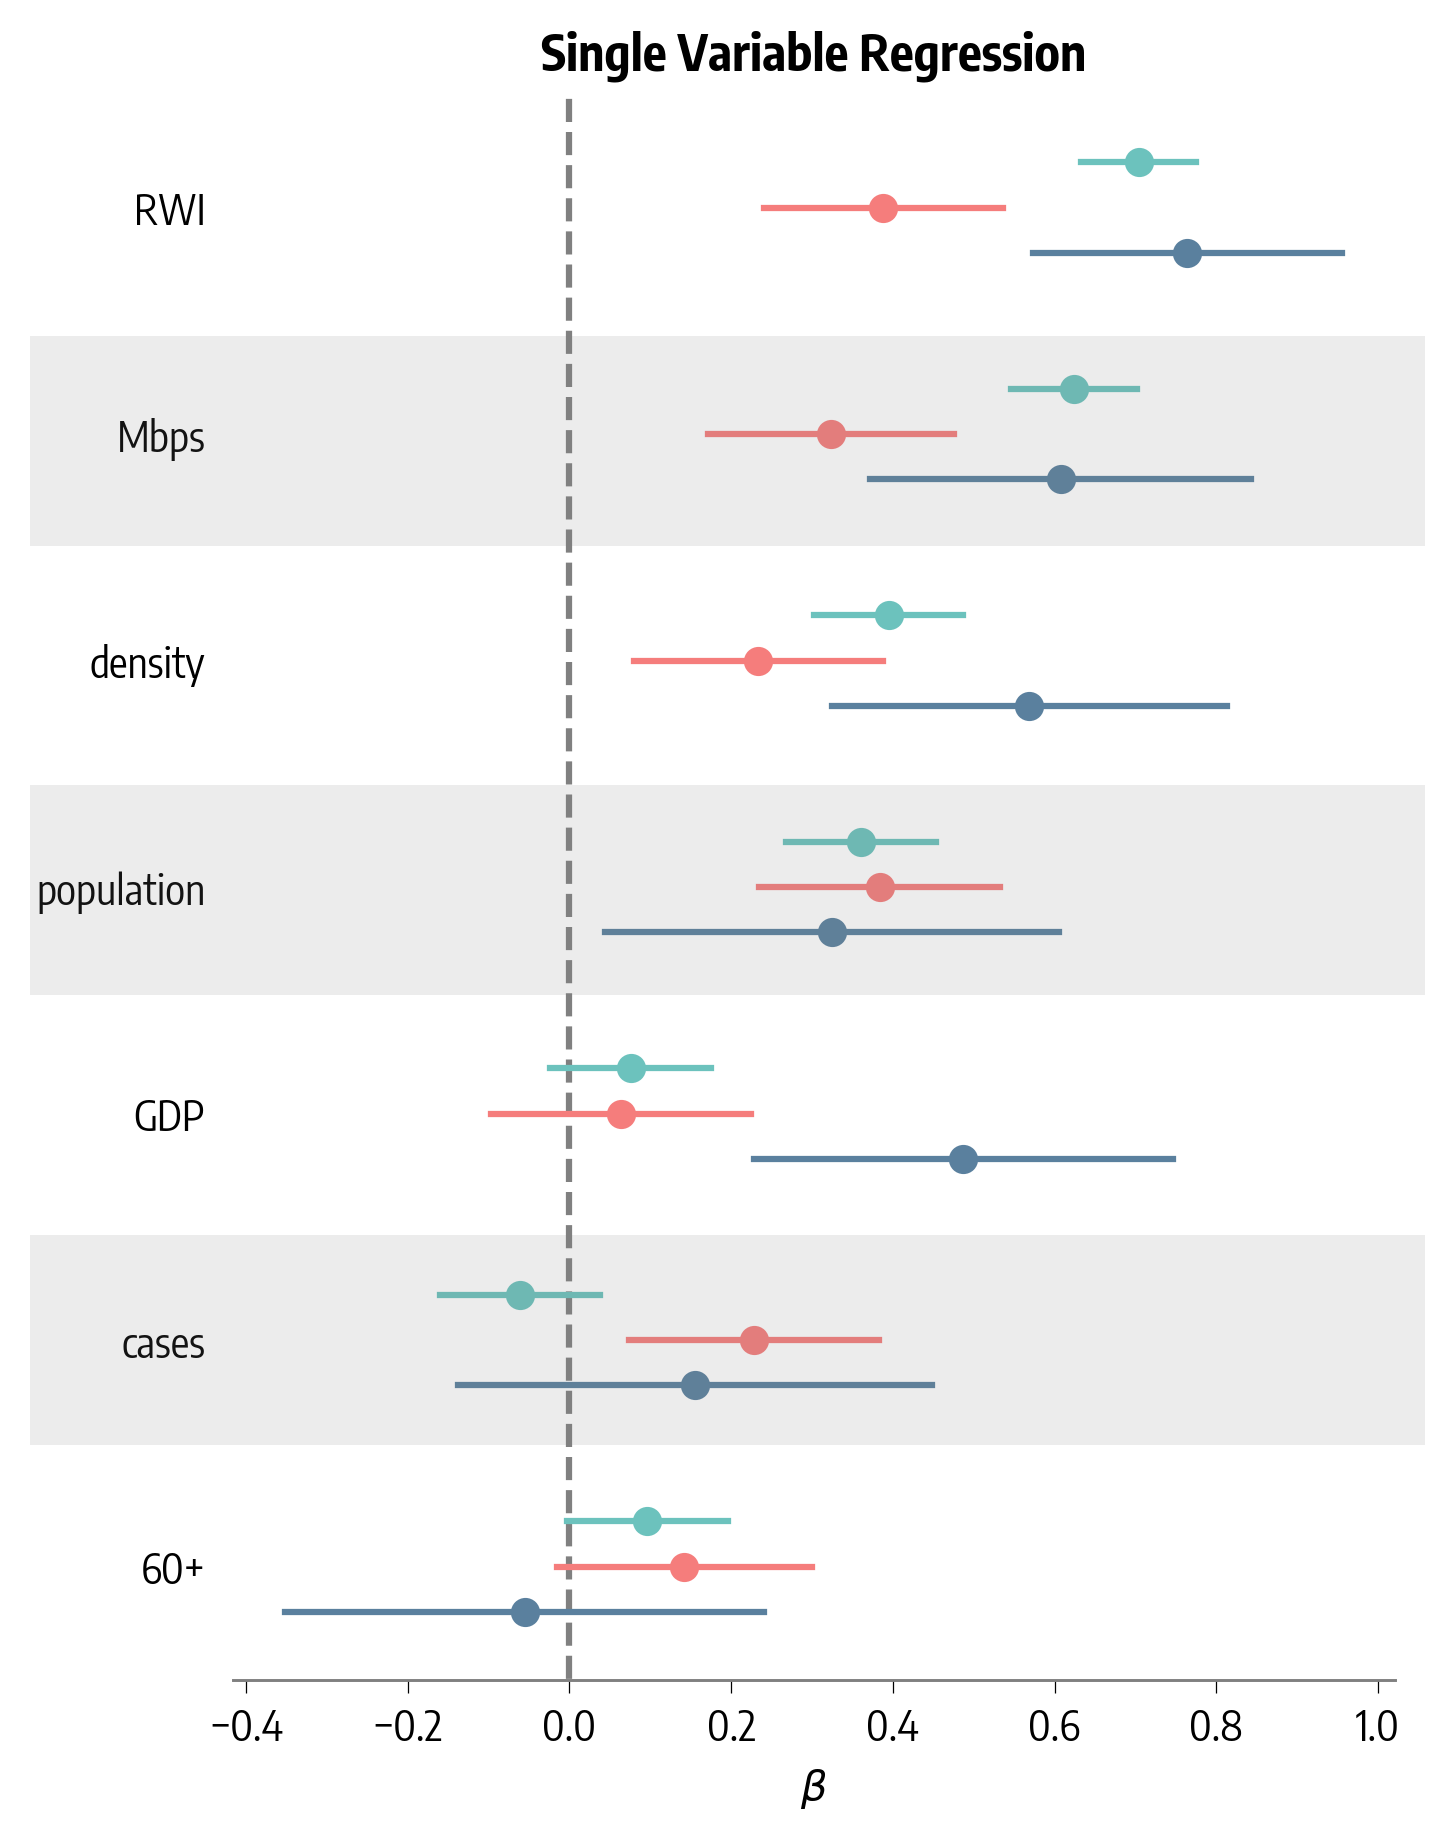

In [8]:
coeffplot(ycol="max_movs", complete=False, legend=False, 
          savename="univar_coeffs", title="Single Variable Regression", OLS=True)

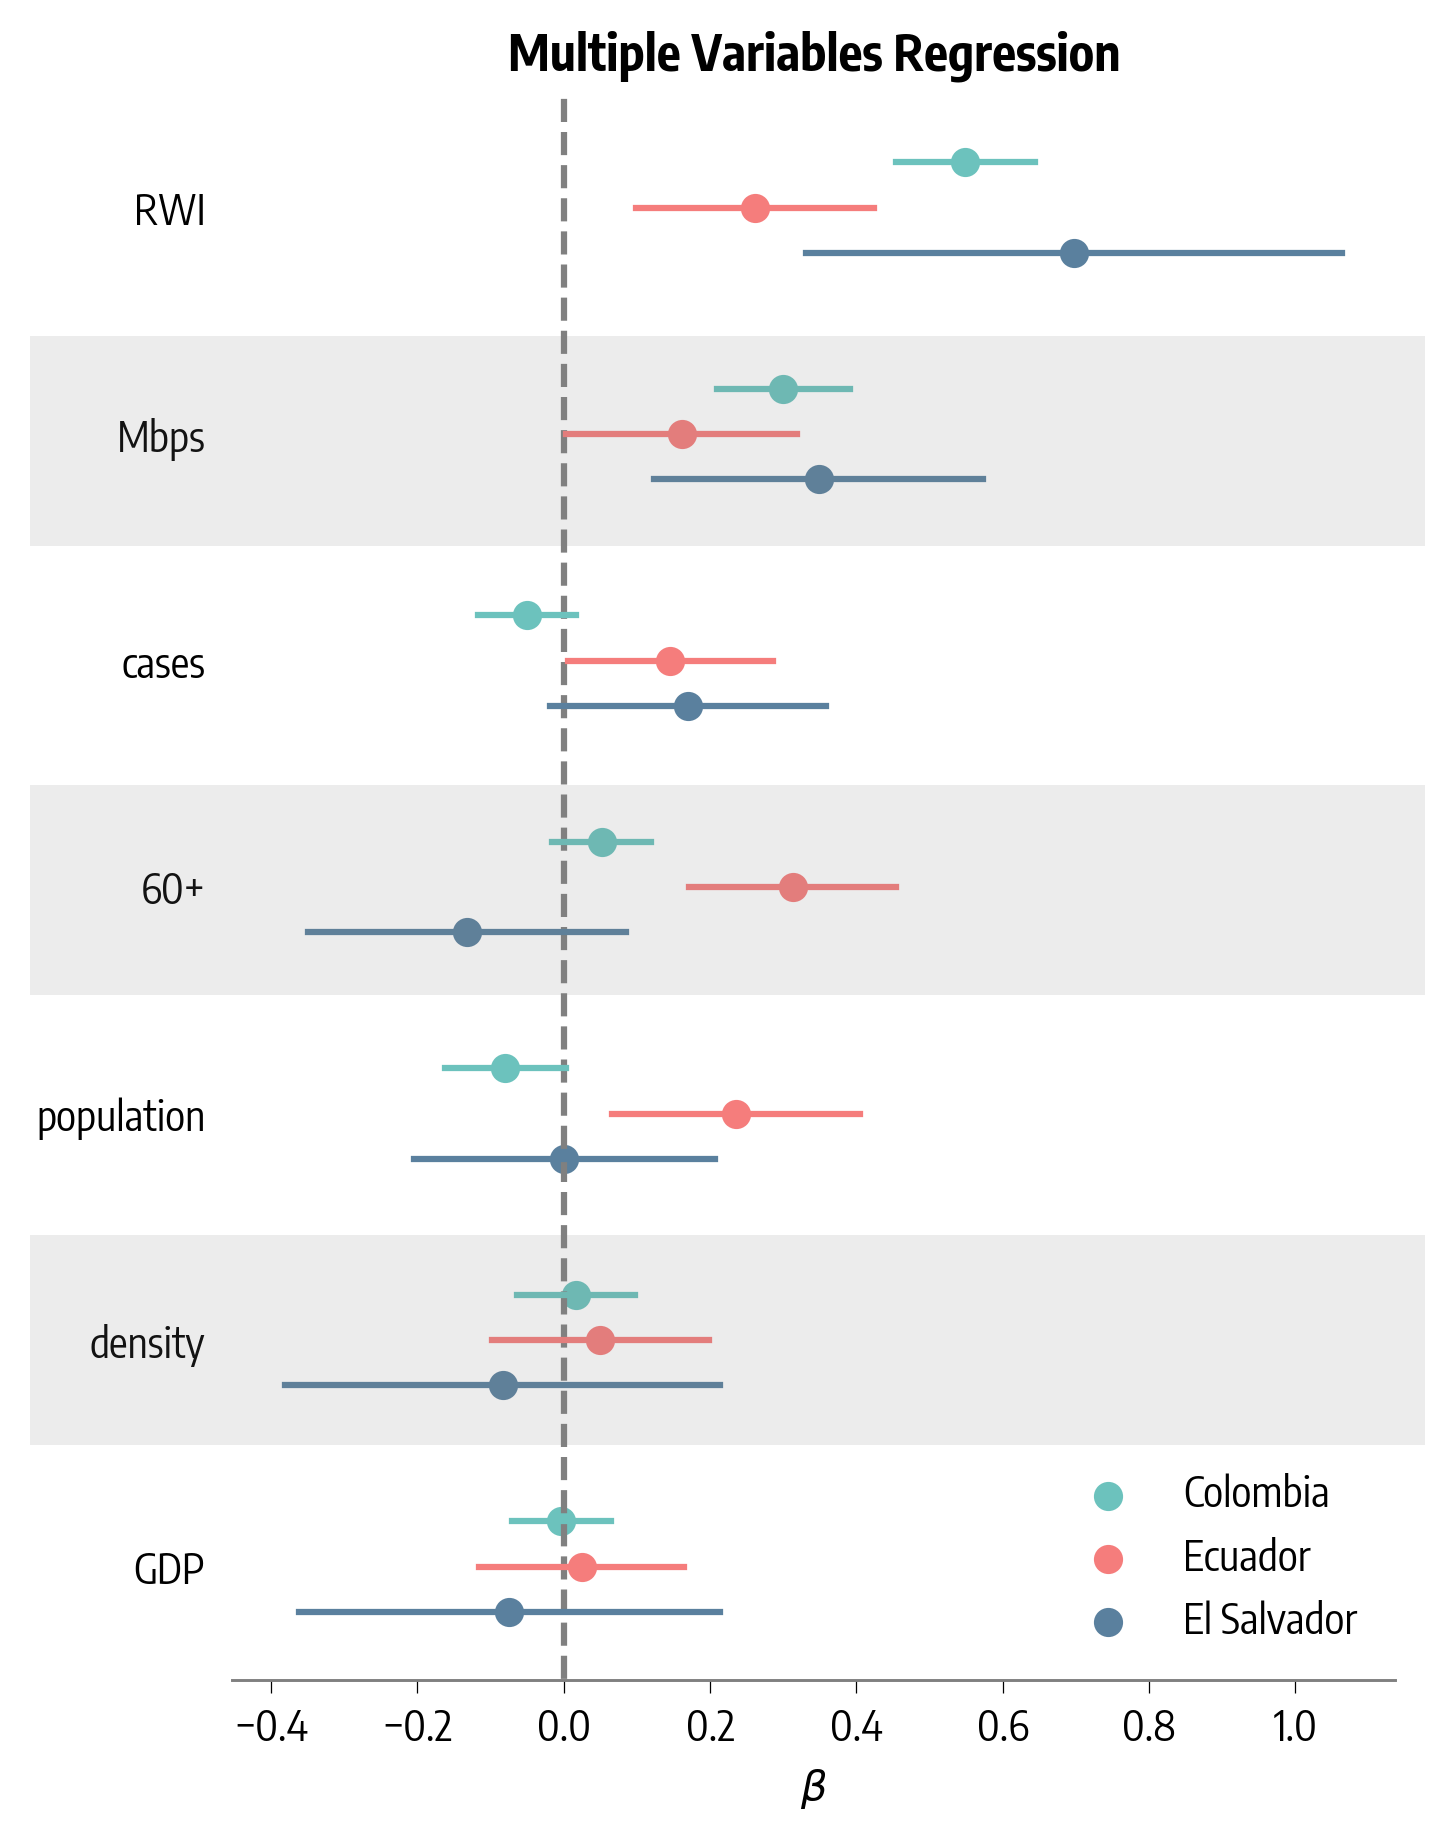

In [9]:
coeffplot(ycol="max_movs", complete=True, legend=True, 
          savename="multivar_coeffs", title="Multiple Variables Regression", OLS=True)

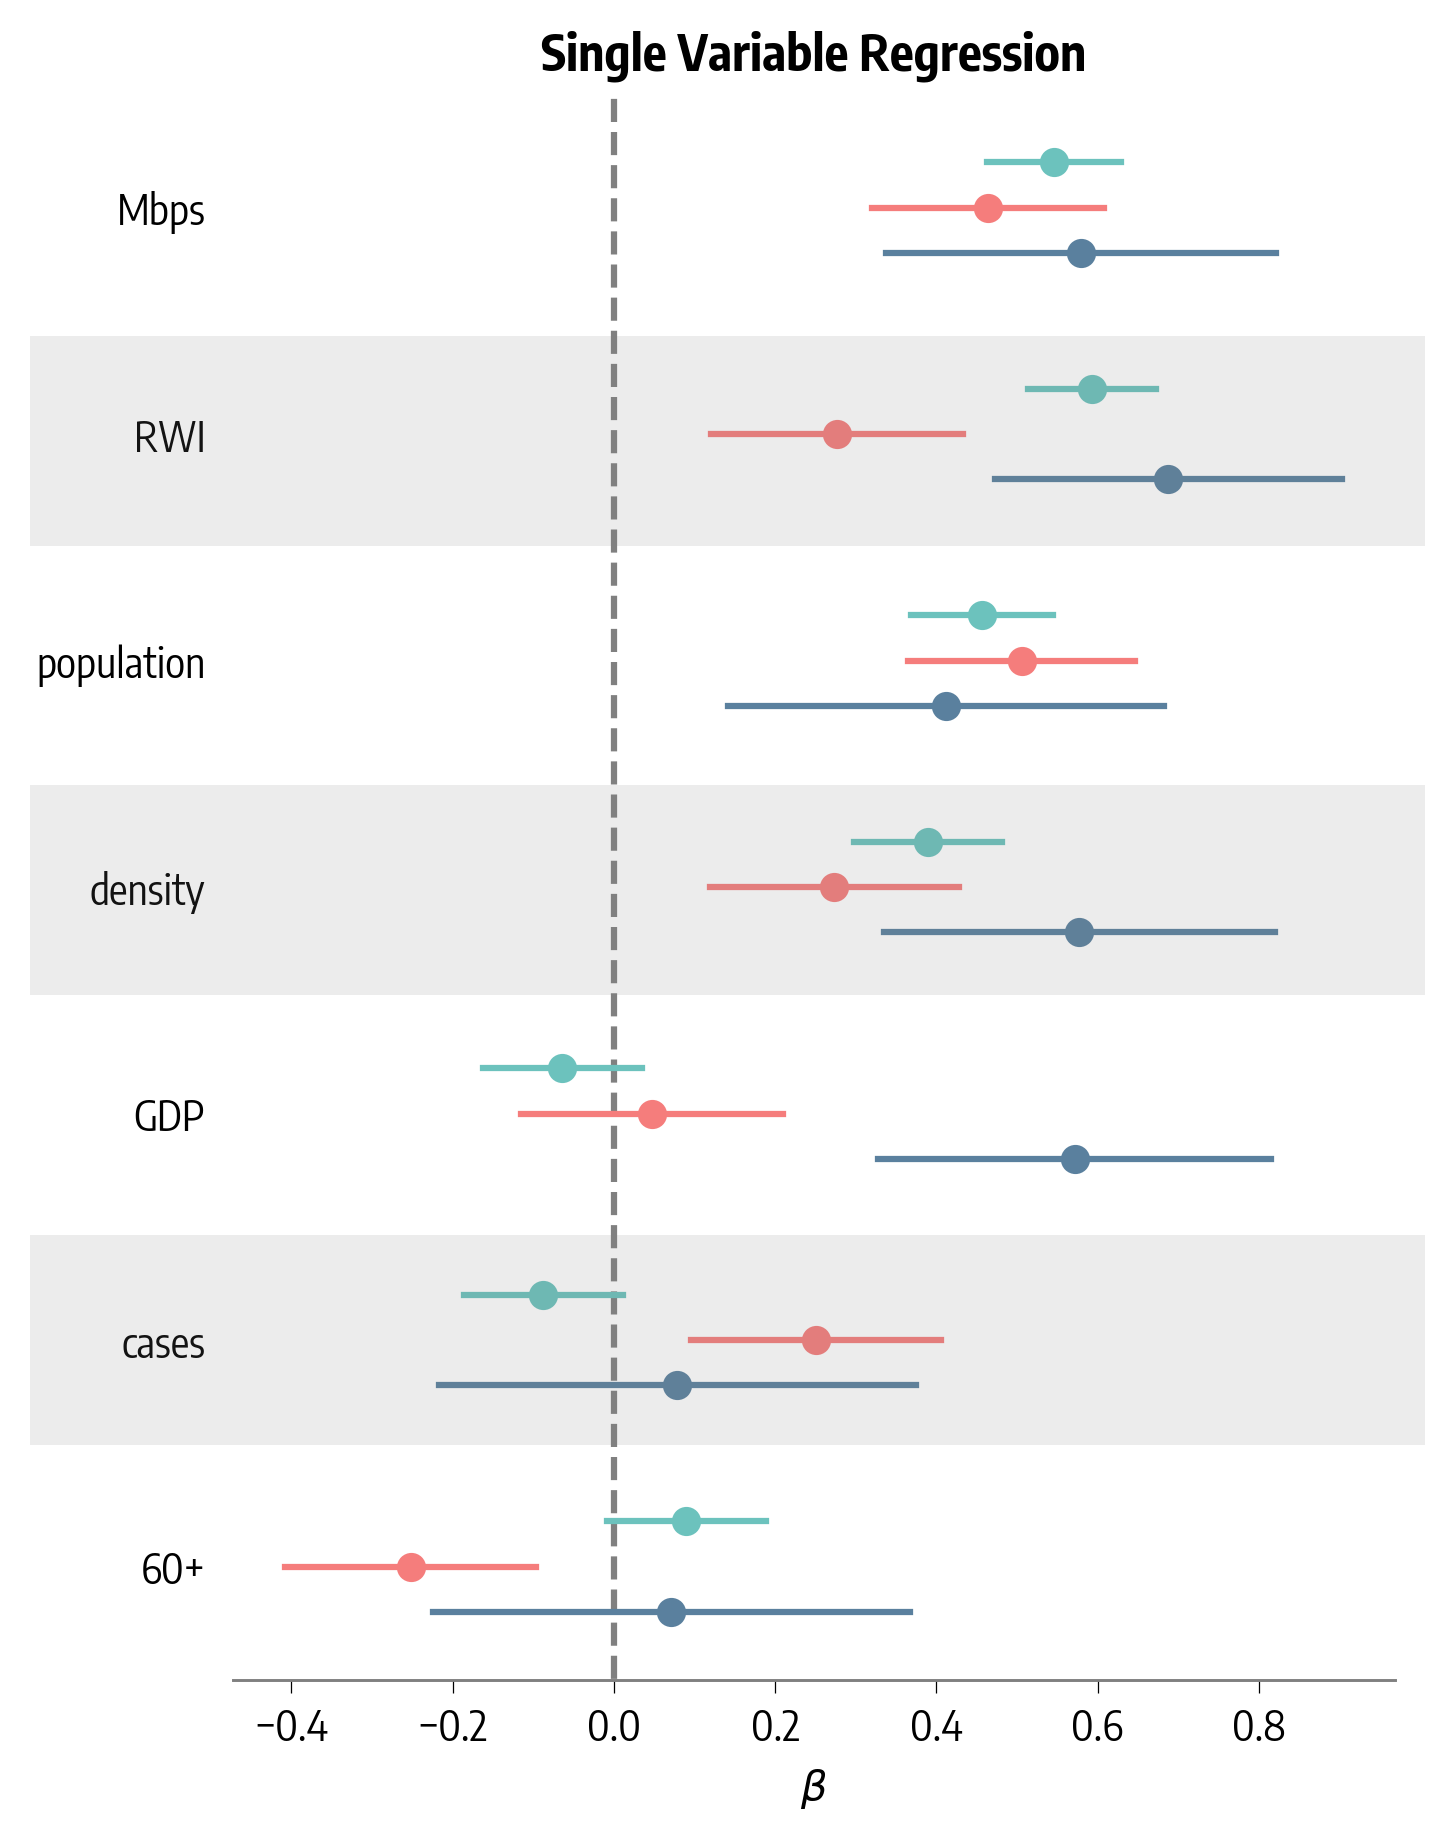

In [10]:
coeffplot(ycol="max_stay", complete=False, legend=False, 
          savename="univar_coeffs", title="Single Variable Regression", OLS=True)

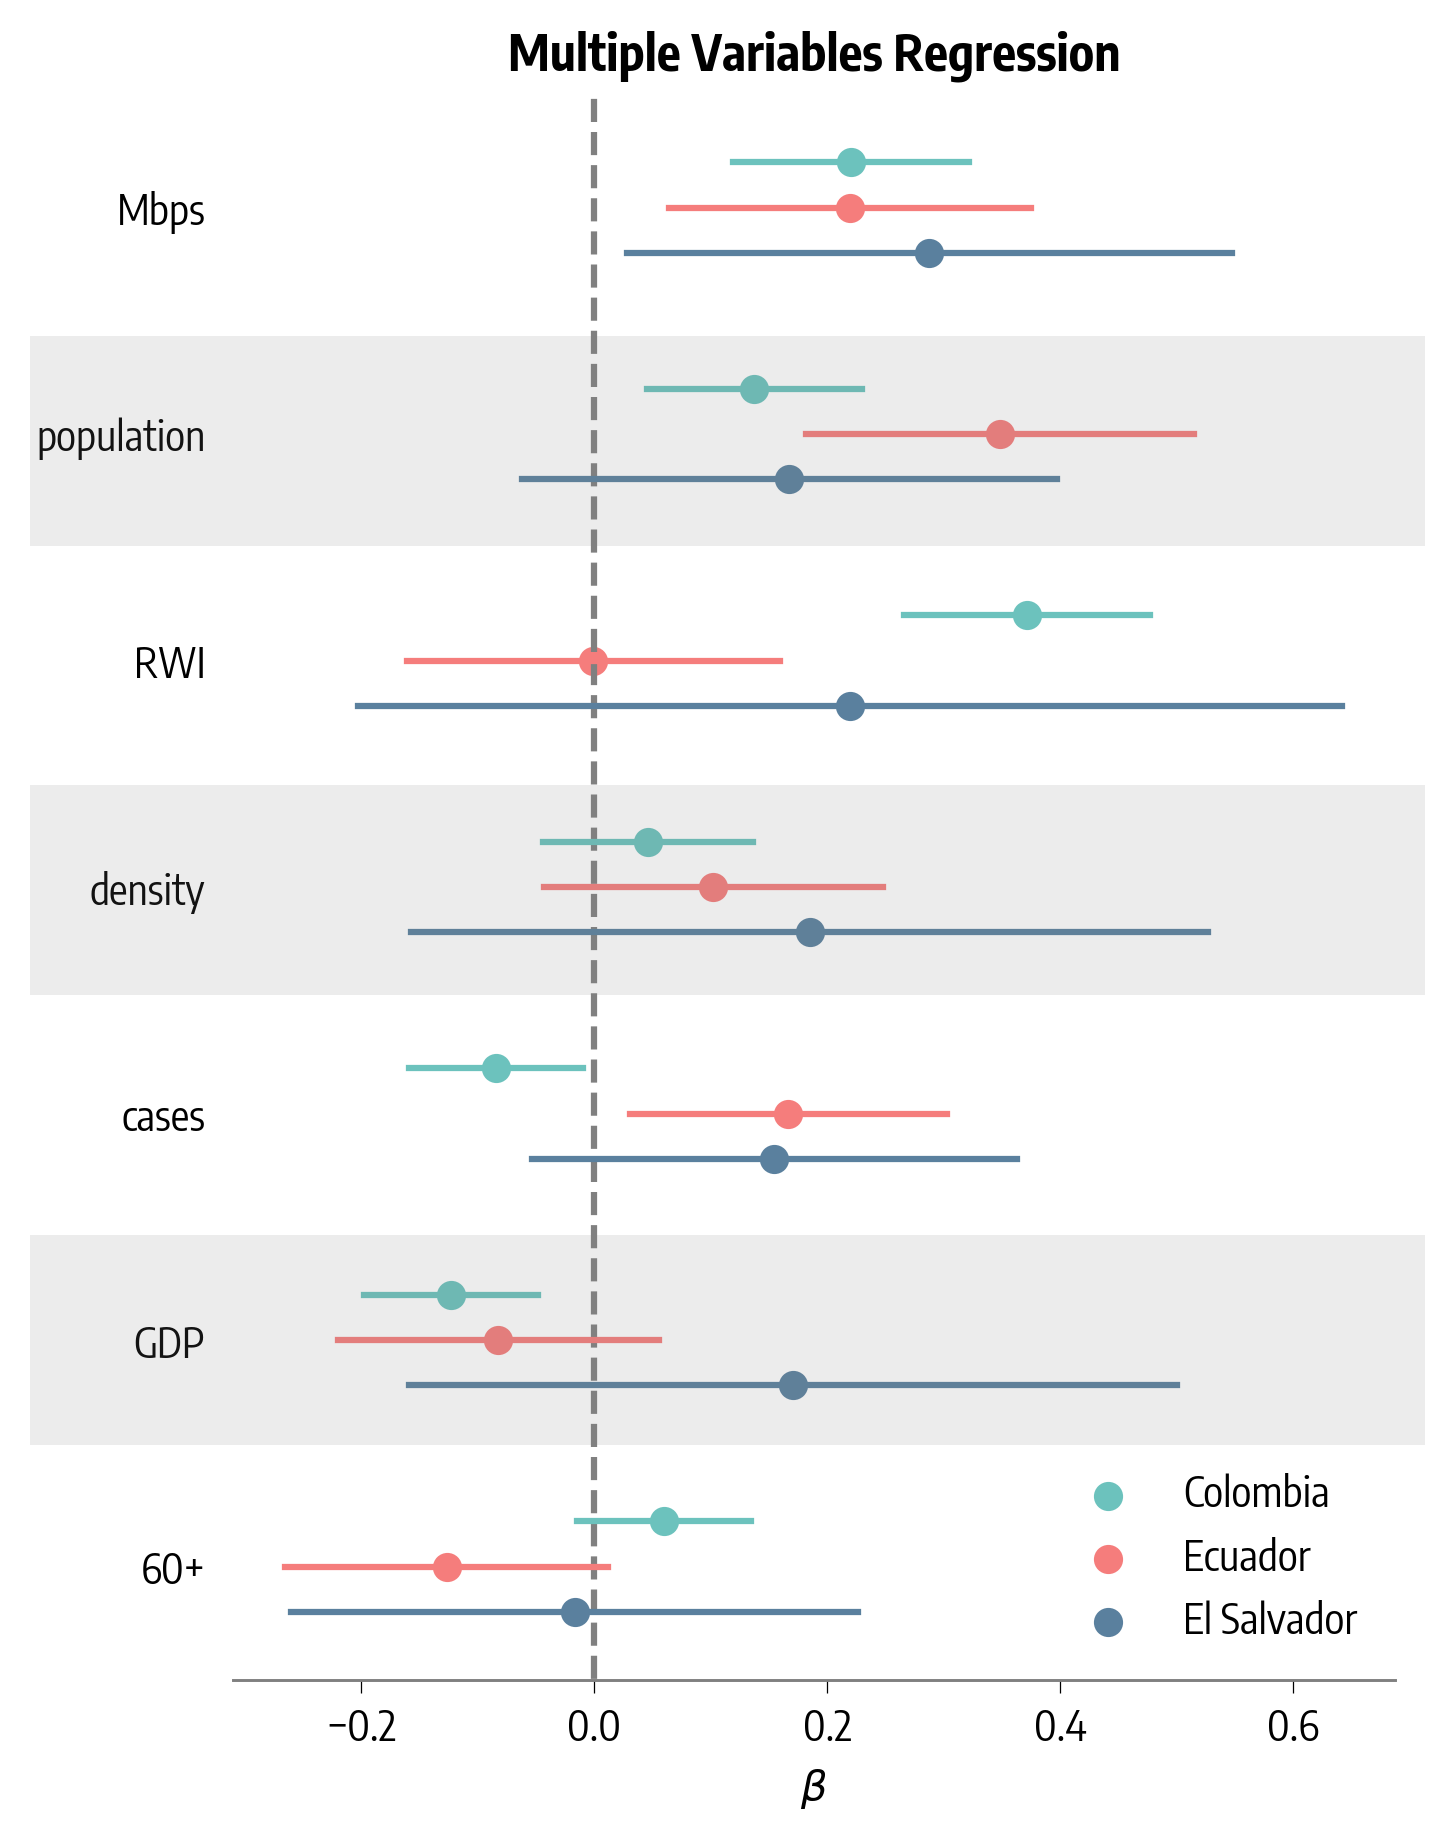

In [11]:
coeffplot(ycol="max_stay", complete=True, legend=True, 
          savename="multivar_coeffs", title="Multiple Variables Regression", OLS=True)

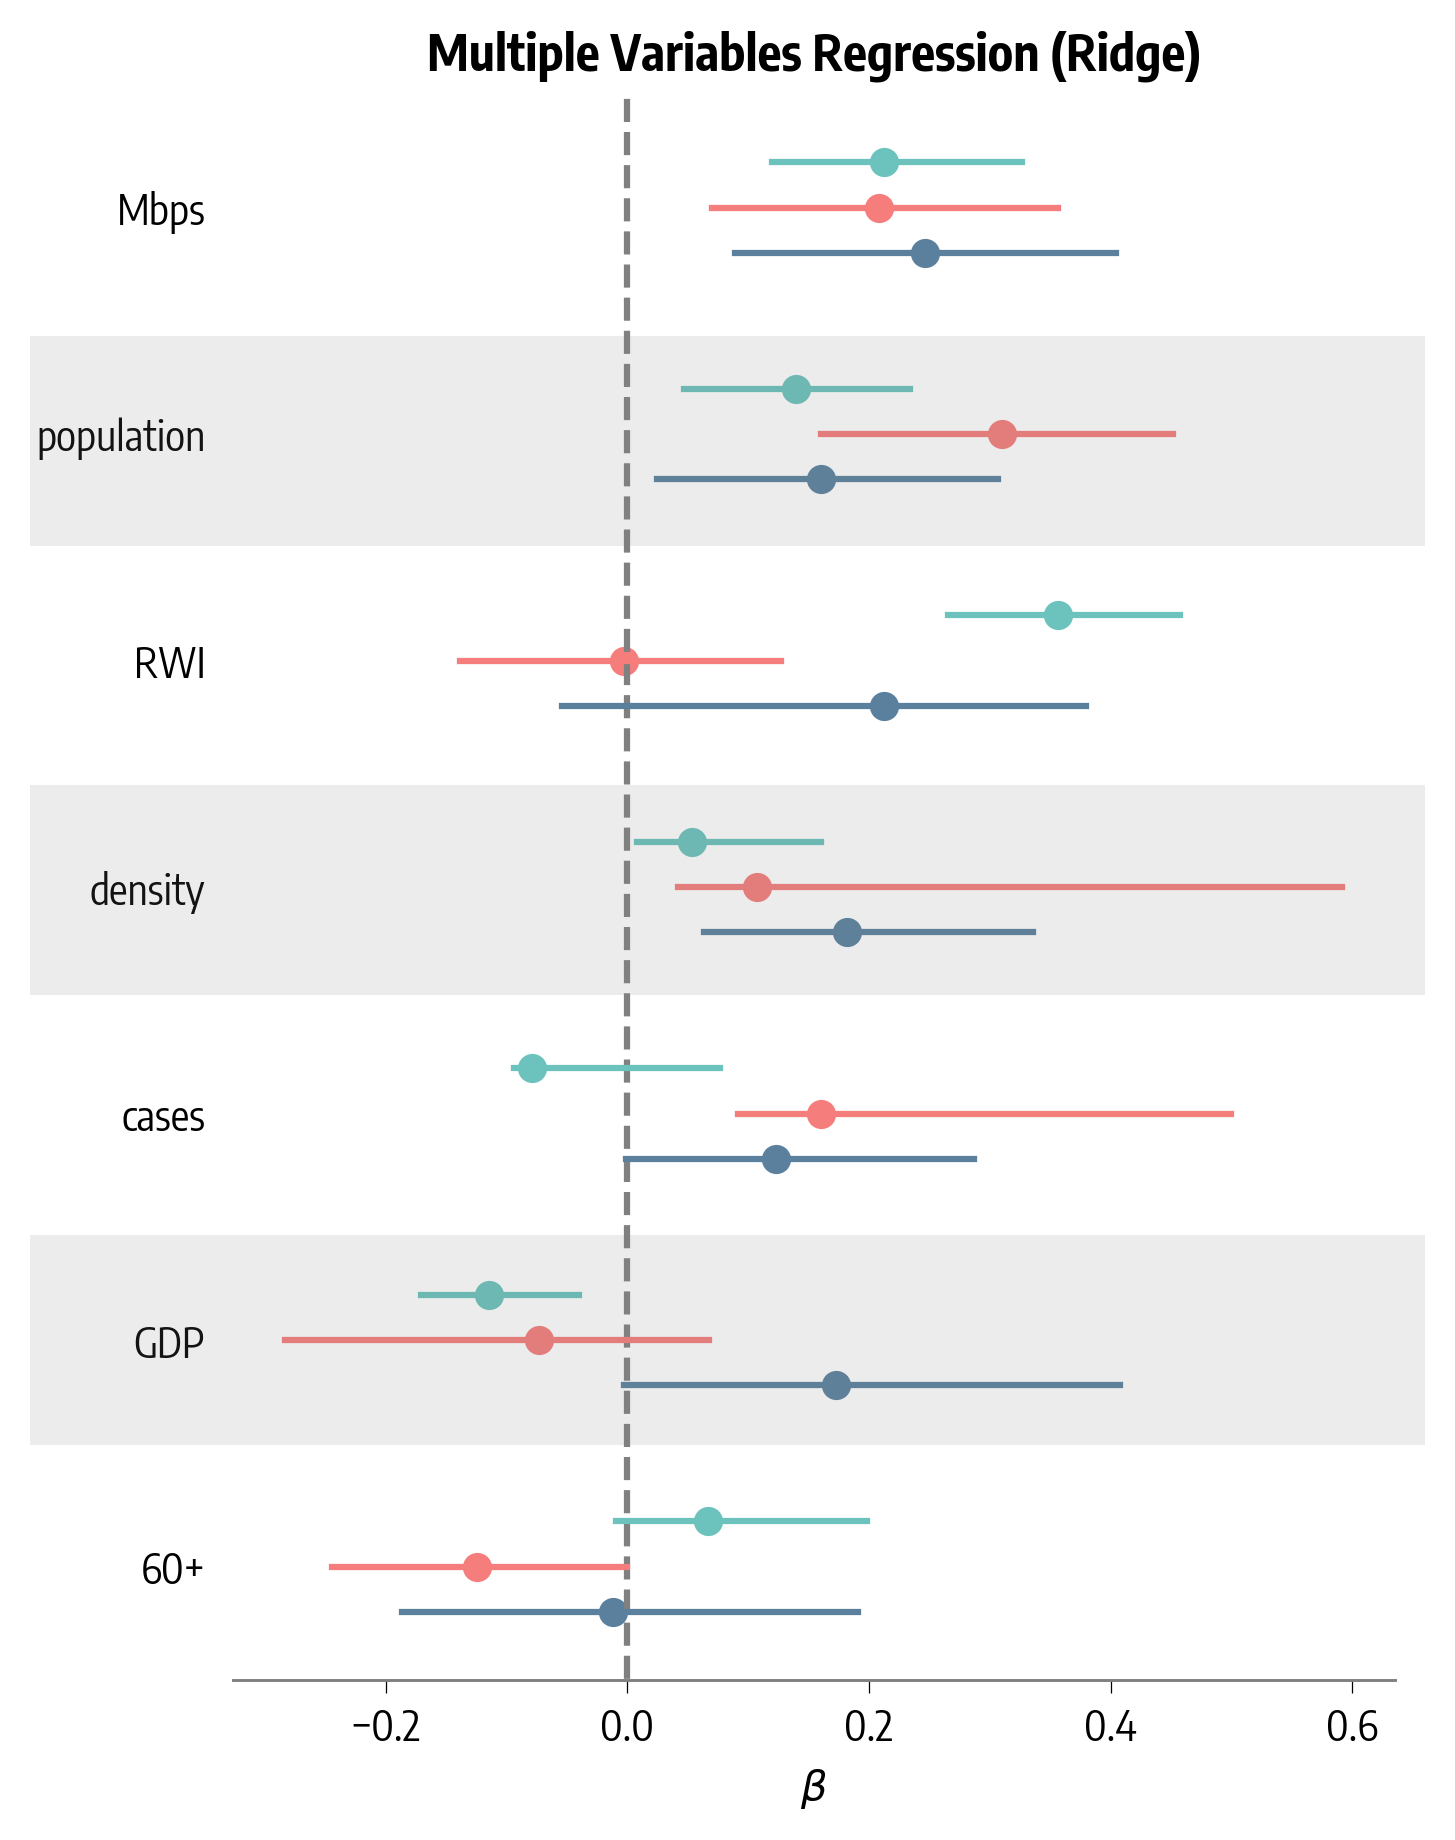

In [16]:
# SI
coeffplot(ycol="max_stay", complete=True, legend=False, 
          savename="multivar_coeffs_Ridge", title="Multiple Variables Regression (Ridge)", OLS=False)

# SI: OLS vs Ridge Comparison

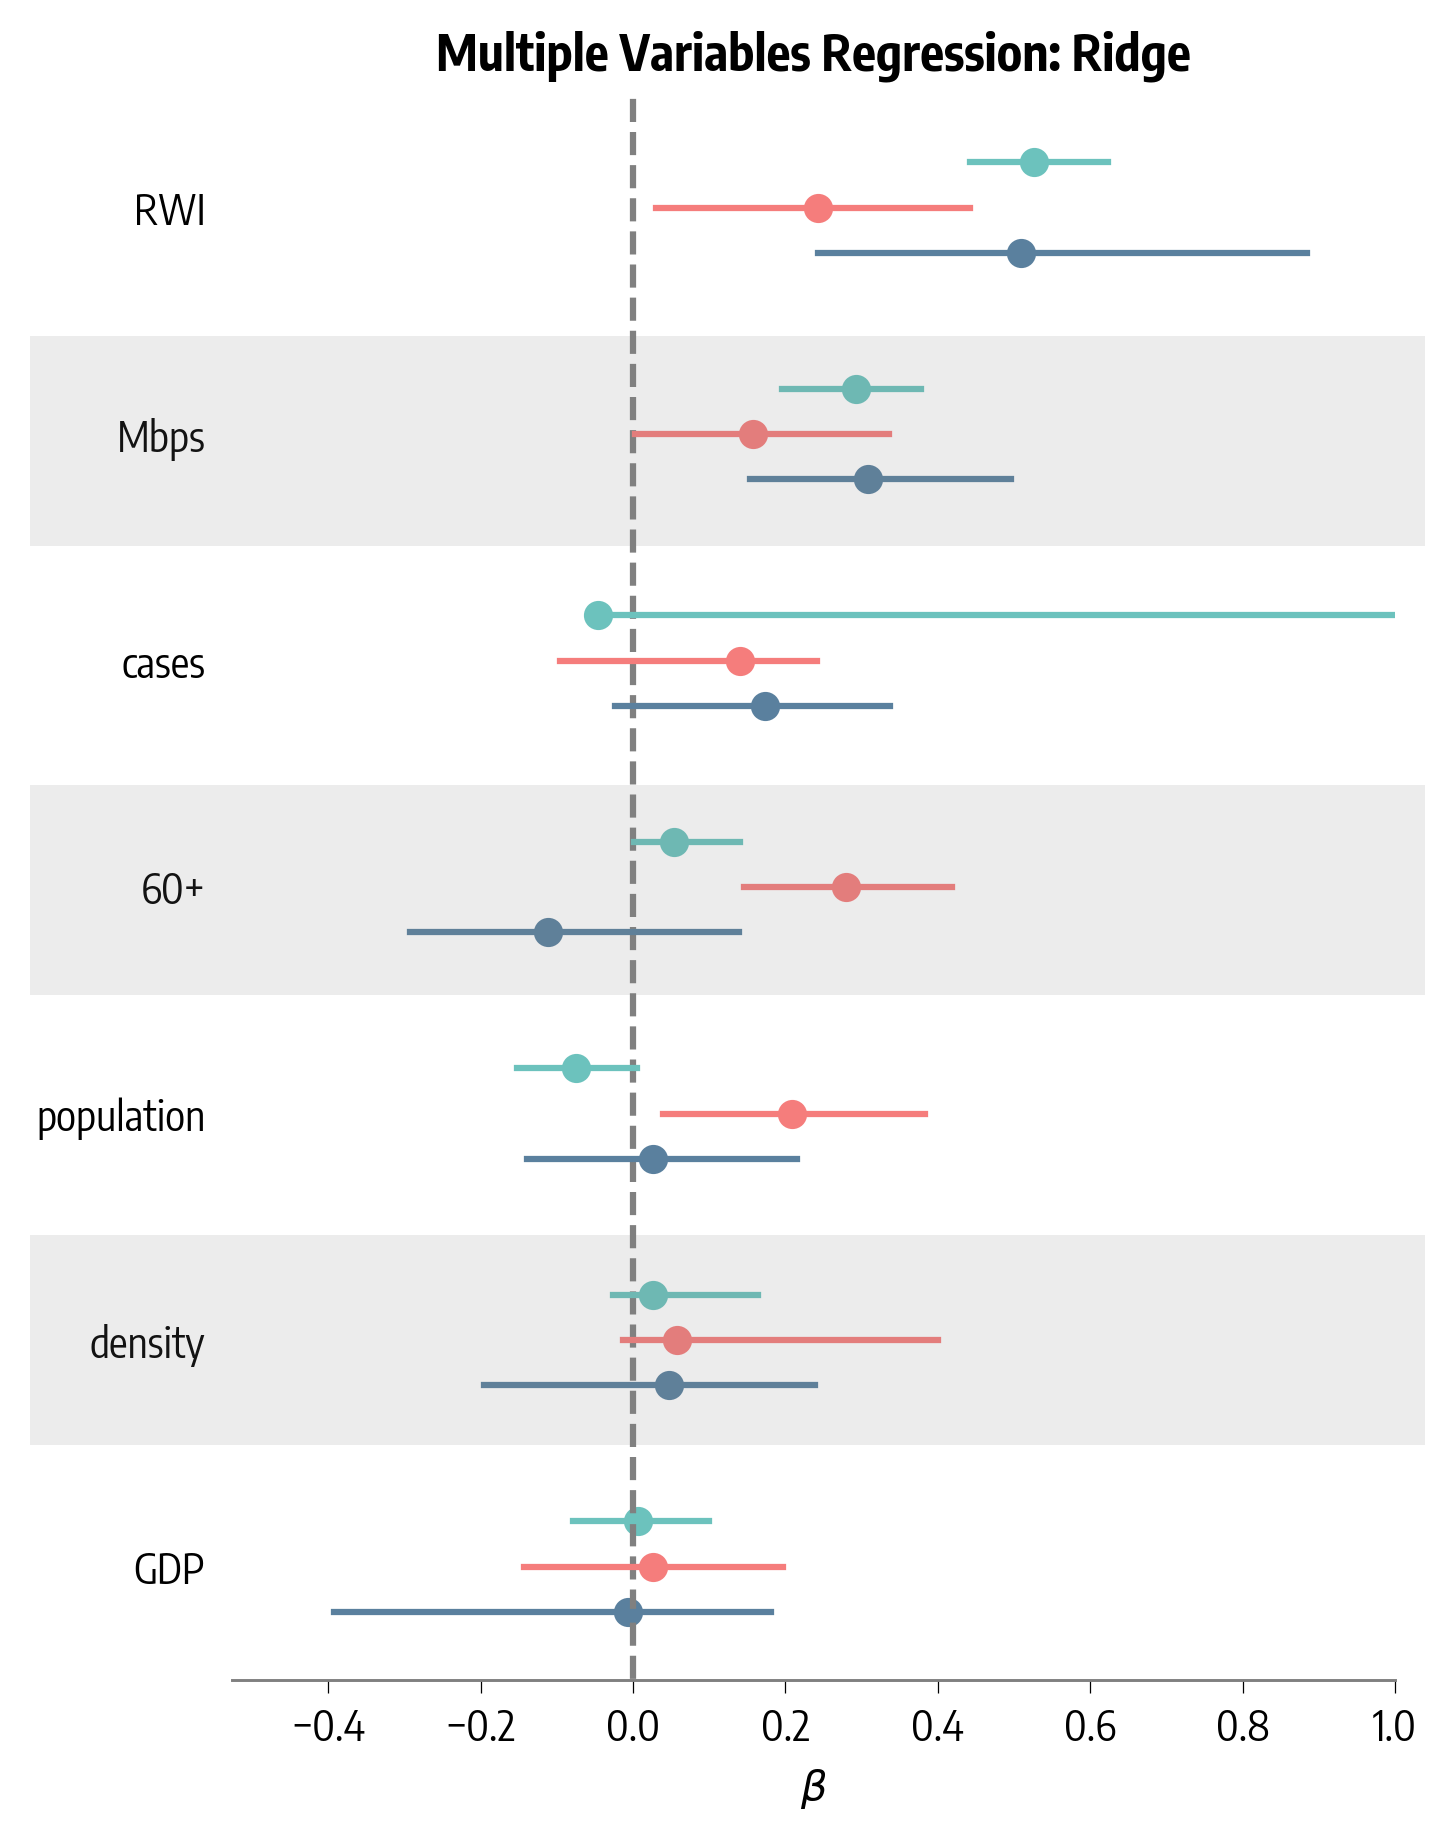

In [12]:
coeffplot(ycol="max_movs", complete=True, legend=False, 
          savename="multivar_coeffs_Ridge", title="Multiple Variables Regression: Ridge", OLS=False, xmax=1.0)

In [13]:
def get_boostrap_conv(country, feature, ycol):
    coeffs = import_coeffs(country, ycol)
    means, q1, q2 = [], [], []
    for i in np.arange(1, len(coeffs["complete"]['Ridge'].params[feature])):
        means.append(np.median(coeffs["complete"]['Ridge'].params[feature][:i]))
        q1.append(np.quantile(coeffs["complete"]['Ridge'].params[feature][:i], q=0.025))
        q2.append(np.quantile(coeffs["complete"]['Ridge'].params[feature][:i], q=0.975))
    return means, q1, q2

def plot_boostrap_conv(country, feature, ycol, ax, color, title):
    means, q1, q2 = get_boostrap_conv(country, feature, ycol)
    p1, = ax.plot(range(len(means)), means, color=color)
    p2 = ax.fill_between(range(len(means)), q1, q2, alpha=0.3, linewidth=0, color=color)
    ax.set_title(title, fontsize=9)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis="y", labelsize=6)
    ax.set_xticks([0, 100, 200, 300, 400, 500])
    ax.tick_params(axis="x", labelsize=6)
    ax.set_xlabel("step", size=7)
    return p1, p2

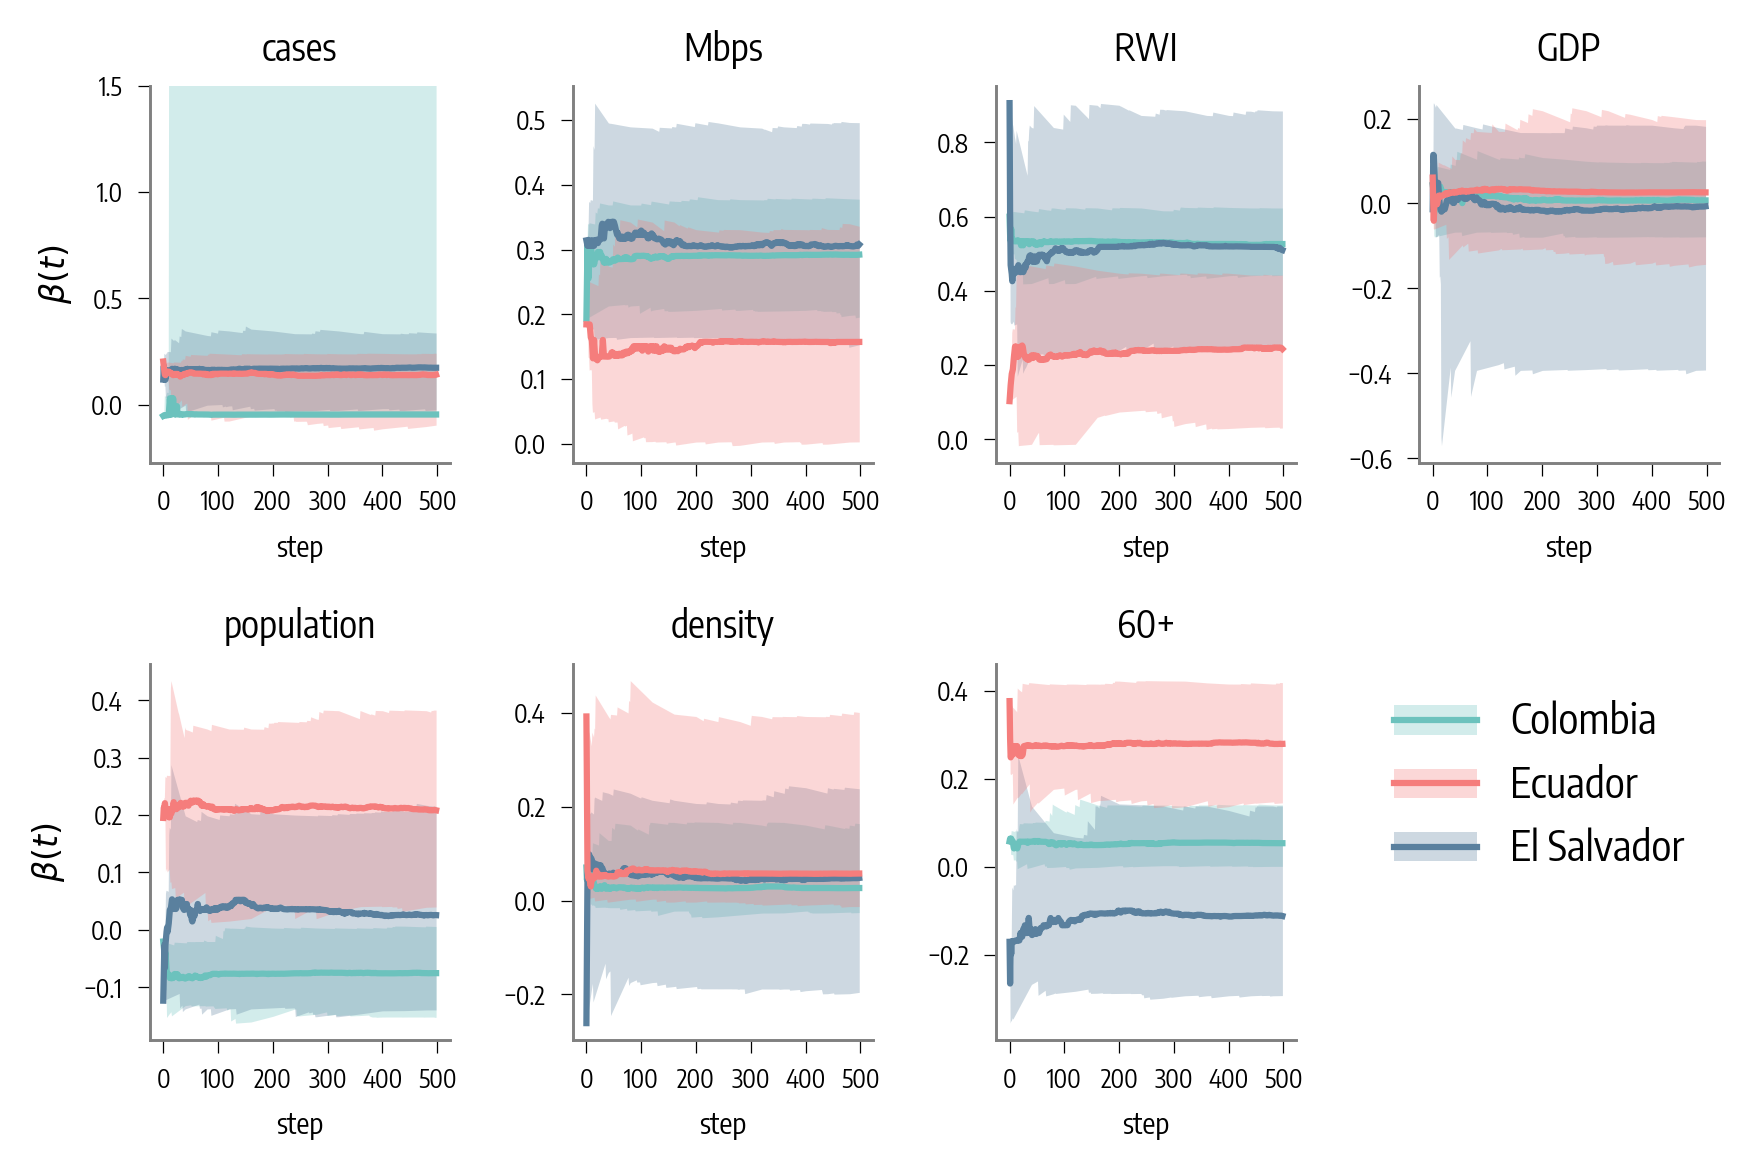

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=4, dpi=300)
features = ['cases', 'download_mbps_fixed', 'rwi_weight', 'gdp_per_capita', 'popDANE', 'pop_density', 'pop60plus_ratio']
features_names = ["cases", 'Mbps', 'RWI', 'GDP', 'population', 'density', '60+']
i,j = 0,0
for k in range(len(features)):
    p1, p2 = plot_boostrap_conv("colombia", features[k], "max_movs", axes[i,j], colors[0], features_names[k])
    if features[k] == "popDANE":
        f = "pop2020"
    else:
        f = features[k]
    p3, p4 = plot_boostrap_conv("el-salvador", f, "max_movs", axes[i,j], colors[1], features_names[k])
    p5, p6 = plot_boostrap_conv("ecuador", f, "max_movs", axes[i,j], colors[3], features_names[k])

    j += 1
    if j == 4:
        i += 1
        j = 0
        
axes[0,0].set_ylabel("$\\beta(t)$", size=8)
axes[1,0].set_ylabel("$\\beta(t)$", size=8)
axes[1, 3].axis("off")

axes[0,0].set_ylim(ymax=1.5)

plt.tight_layout()
axes[1,2].legend([(p1, p2), (p5, p6), (p3, p4)], ["Colombia", "Ecuador", "El Salvador"], frameon=False, bbox_to_anchor=[1.2,1,0,0])
plt.savefig("./img/boostrap_conv.pdf", bbox_inches="tight")

# SI: Internet Adoption

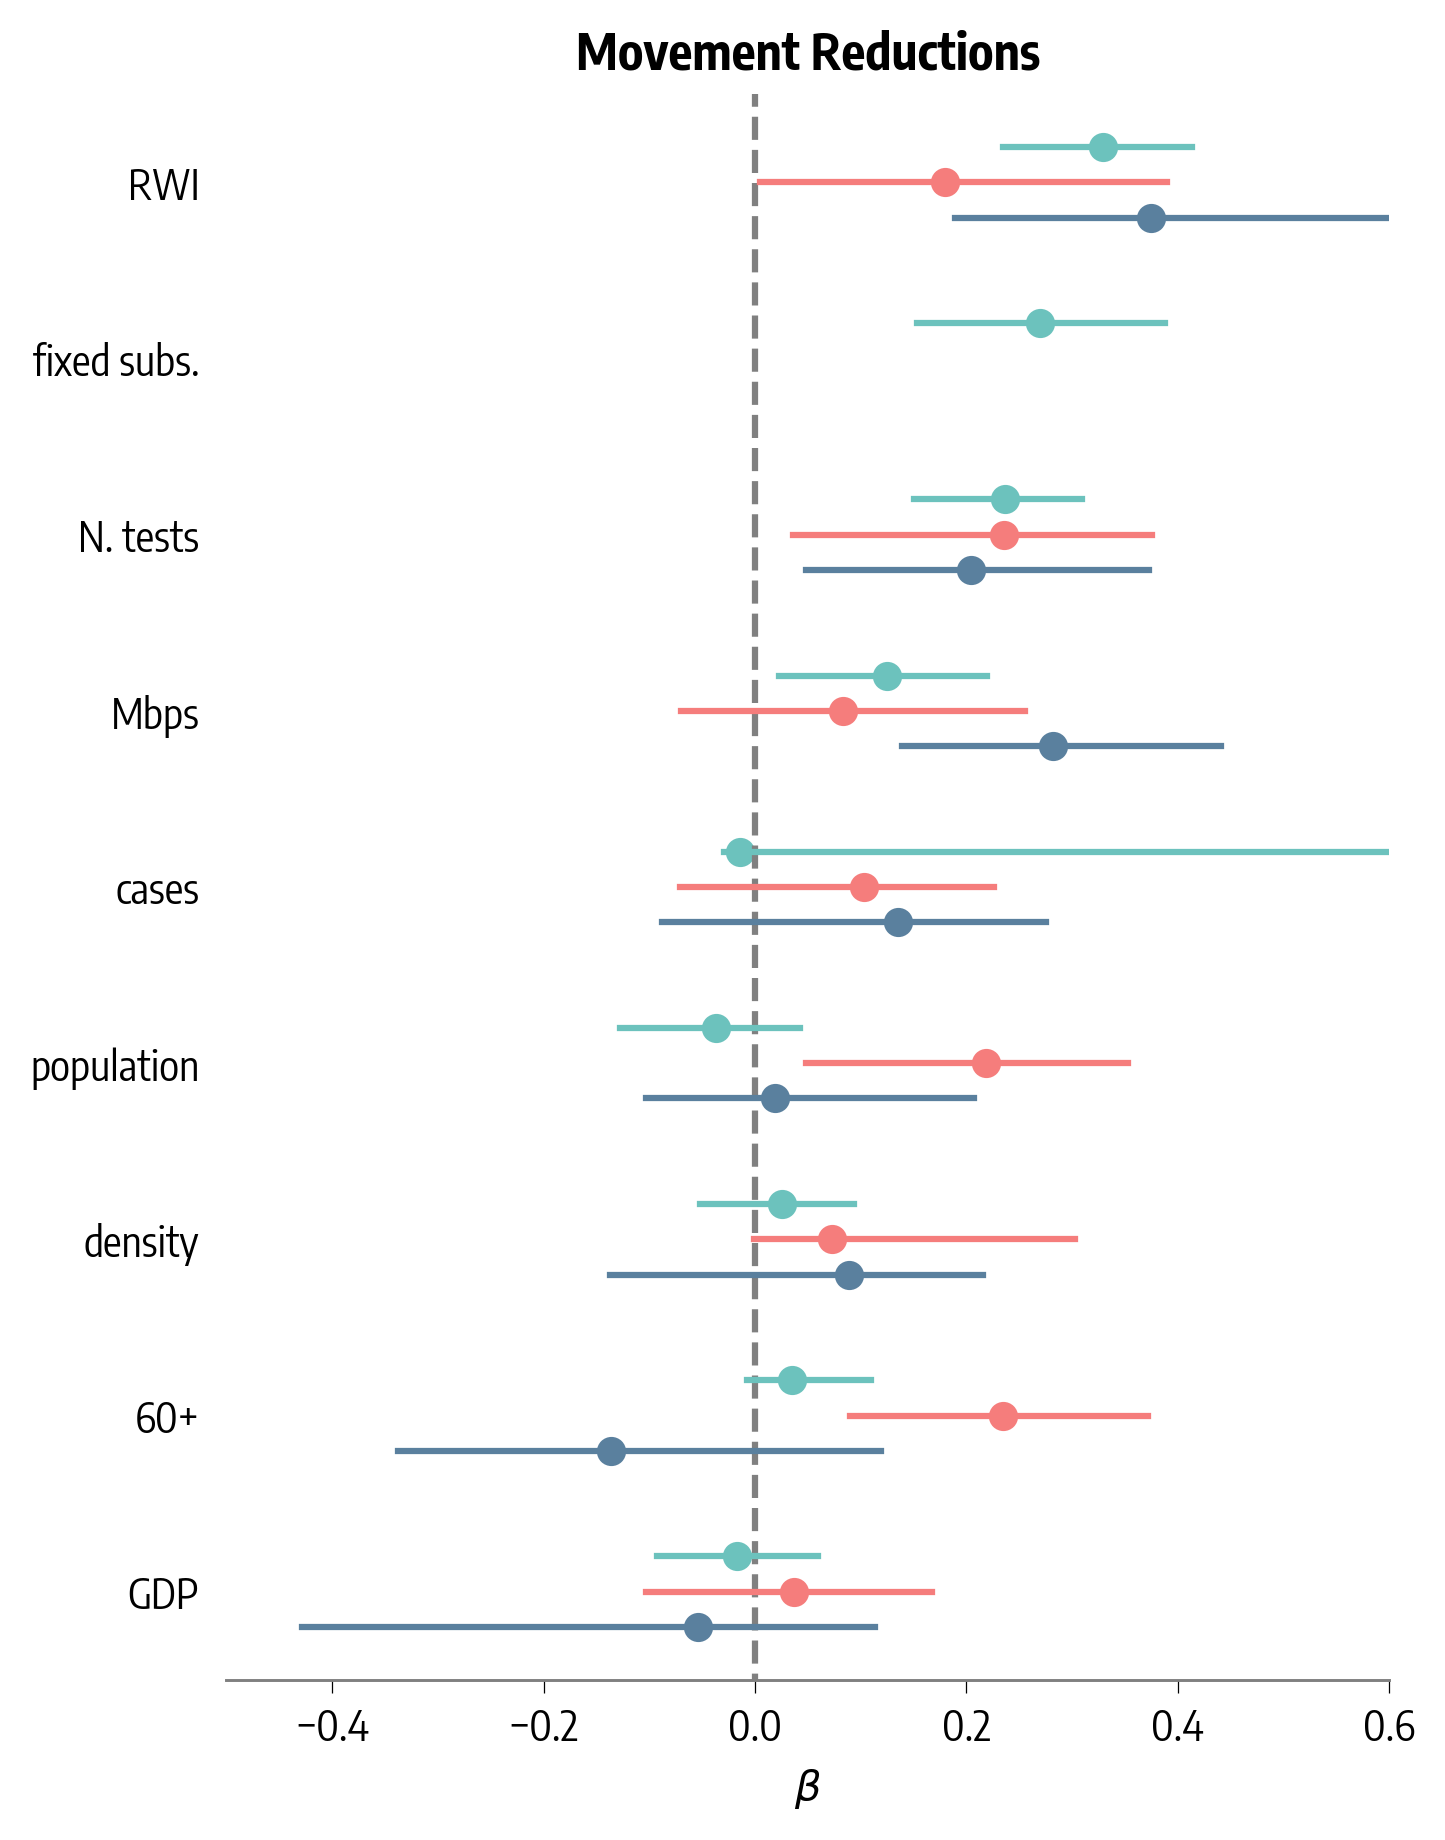

In [18]:
coeffplot(ycol="max_movs", complete=True, legend=False, savename="multivar_coeffs_Ridge_internet_adoption",
          title="Movement Reductions", OLS=False, xmax=0.6, xmin=-0.5,
          features = ['cases', 'download_mbps_fixed', 'rwi_weight', 'gdp_per_capita', 'popDANE', 'pop_density', 'pop60plus_ratio', 'tests_unique_dev_fixed', 'internet_pen'],
          features_names = ["cases", 'Mbps', 'RWI', 'GDP', 'population', 'density', '60+', "N. tests", "fixed subs."],
          suffs="_internet_adoption", showbox=False)

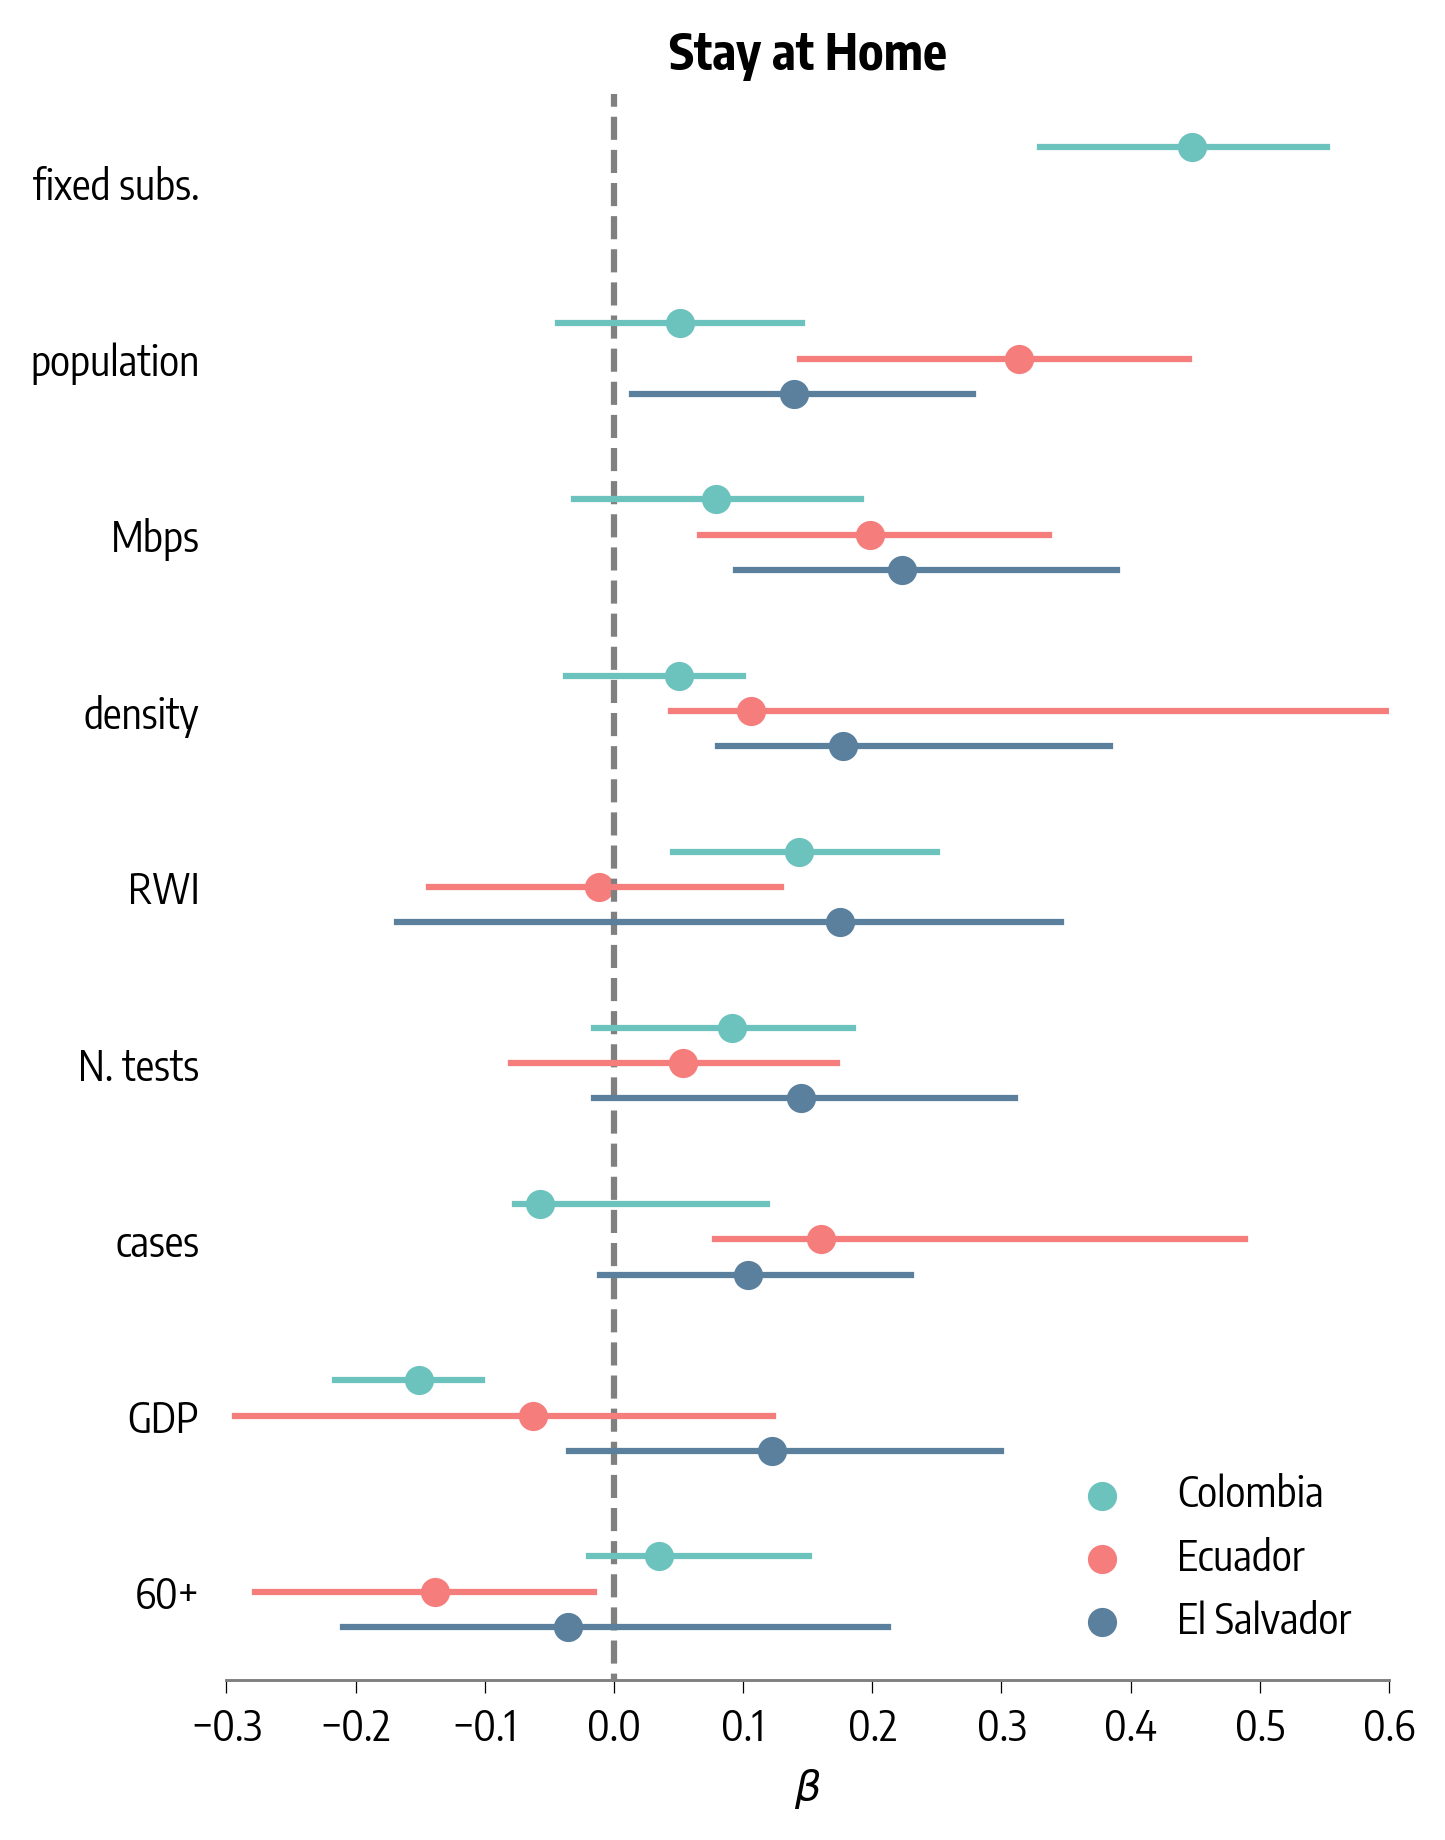

In [19]:
coeffplot(ycol="max_stay", complete=True, legend=True, savename="multivar_coeffs_Ridge_internet_adoption",
          title="Stay at Home", OLS=False, xmax=0.6, xmin=-0.3,
          features = ['cases', 'download_mbps_fixed', 'rwi_weight', 'gdp_per_capita', 'popDANE', 'pop_density', 'pop60plus_ratio', 'tests_unique_dev_fixed', 'internet_pen'],
          features_names = ["cases", 'Mbps', 'RWI', 'GDP', 'population', 'density', '60+', "N. tests", "fixed subs."],
          suffs="_internet_adoption", showbox=False)